# Week 2: SciKitLearn for Stock Predictions

## Intro

* This content is based on https://github.com/VincentTatan/PythonAnalytics and was created for Week 2 of the Machine Learning for Moeny course with Siraj Raval. I changed to code to look at Canadian ETF funds that I watch. 



# Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [80]:
import sys
print (sys.prefix)

C:\ProgramData\Anaconda3


In [81]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2019, 8, 1)

df = web.DataReader("VCN.TO", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-29,33.439999,33.279999,33.439999,33.310001,44400.0,33.310001
2019-07-30,33.279999,33.169998,33.220001,33.250000,32900.0,33.250000
2019-07-31,33.250000,32.910000,33.240002,33.130001,40400.0,33.130001
2019-08-01,33.340000,33.049999,33.099998,33.070000,55000.0,33.070000
2019-08-02,33.040001,32.730000,33.040001,32.849998,76800.0,32.849998


Get the dimension of dataframe

In [82]:
df.shape

(650, 6)

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [83]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2019-07-22    32.791677
2019-07-23    32.806569
2019-07-24    32.821084
2019-07-25    32.833390
2019-07-26    32.845613
2019-07-29    32.857036
2019-07-30    32.868646
2019-07-31    32.880139
2019-08-01    32.888866
2019-08-02    32.894999
Name: Adj Close, dtype: float64

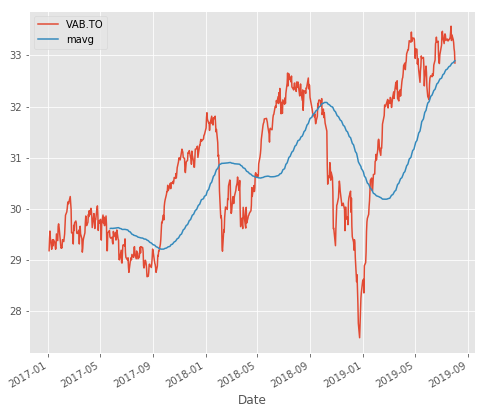

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='VAB.TO')
mavg.plot(label='mavg')
plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [85]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2017-01-03         NaN
2017-01-04    0.008347
2017-01-05    0.004776
2017-01-06   -0.005070
2017-01-09   -0.007006
Name: Adj Close, dtype: float64

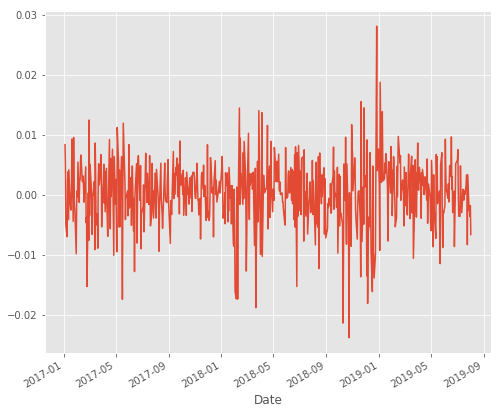

In [86]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

In [87]:
dfcomp = web.DataReader(['VUN.TO', 'VAB.TO', 'XIC.TO', 'XEF.TO', 'VCN.TO', 'XEC.TO'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,VAB.TO,VCN.TO,VUN.TO,XEC.TO,XEF.TO,XIC.TO
Date,,,,,,
2019-07-29,25.981577,33.310001,55.080002,26.040001,29.969999,26.270000
2019-07-30,25.971621,33.250000,55.029999,25.790001,29.629999,26.240000
2019-07-31,25.994631,33.130001,54.650002,25.610001,29.559999,26.139999
2019-08-01,26.174250,33.070000,54.119999,25.100000,29.459999,26.110001
2019-08-02,26.204185,32.849998,53.689999,24.920000,29.240000,25.930000


Get the dimension of dataframes

In [88]:
dfcomp.shape

(650, 6)

In [89]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,VAB.TO,VCN.TO,VUN.TO,XEC.TO,XEF.TO,XIC.TO
Symbols,,,,,,
VAB.TO,1.000000,-0.164633,-0.147611,-0.128703,-0.115875,-0.157931
VCN.TO,-0.164633,1.000000,0.653215,0.591240,0.661651,0.991302
VUN.TO,-0.147611,0.653215,1.000000,0.667018,0.814584,0.663412
XEC.TO,-0.128703,0.591240,0.667018,1.000000,0.741467,0.601761
XEF.TO,-0.115875,0.661651,0.814584,0.741467,1.000000,0.672066
XIC.TO,-0.157931,0.991302,0.663412,0.601761,0.672066,1.000000


You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


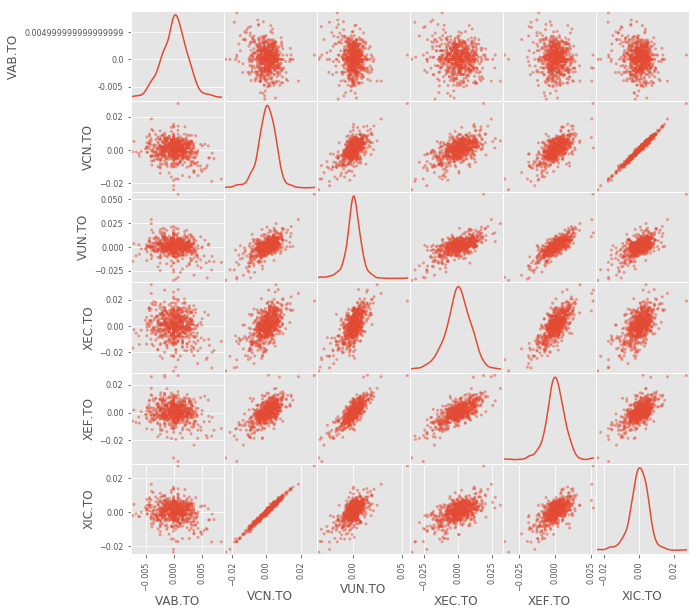

In [90]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

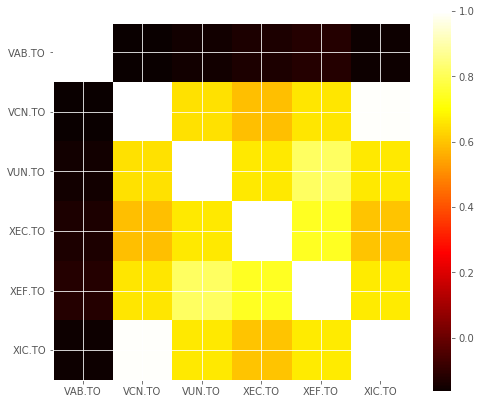

In [91]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Kurtosis and skewness

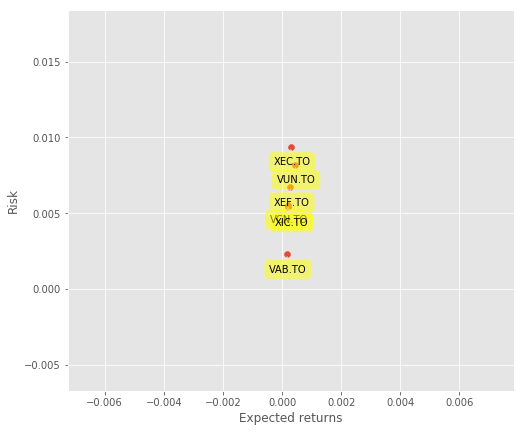

In [92]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [93]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,31.280001,31.059999,31.219999,31.150000,141800.0,29.181637
2017-01-04,31.420000,31.230000,31.270000,31.410000,90300.0,29.425205
2017-01-05,31.629999,31.480000,31.500000,31.559999,66300.0,29.565727
2017-01-06,31.549999,31.360001,31.549999,31.400000,91100.0,29.415838
2017-01-09,31.400000,31.160000,31.400000,31.180000,121500.0,29.209740


In [94]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

dfpoly2 = df.loc[:,['Adj Close','Volume']]
dfpoly2['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfpoly2['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfpoly2.head()

dfpoly3 = df.loc[:,['Adj Close','Volume']]
dfpoly3['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfpoly3['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfpoly3.head()

dfknn = df.loc[:,['Adj Close','Volume']]
dfknn['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfknn['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfknn.head()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2017-01-03,29.181637,141800.0,0.706264,-0.224214
2017-01-04,29.425205,90300.0,0.604905,0.447712
2017-01-05,29.565727,66300.0,0.475284,0.190474
2017-01-06,29.415838,91100.0,0.605091,-0.475435
2017-01-09,29.209740,121500.0,0.769723,-0.700635


In [95]:
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg))) #experimenting with 2%

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(650, 4)
Dimension of X (643, 4)
Dimension of y (643,)


In [96]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

## Test the model

In [98]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.8802583382781232
The quadratic regression 2 confidence is  0.8780434811494645
The quadratic regression 3 confidence is  0.8610951198981989
The knn regression confidence is  0.8180403570067879


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time.

We need to plot out the graph to make the most sense of it 

In [99]:
# Plotting the Prediction - Linear Regression

In [100]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately) #added in the "reg"
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out) #added in the "reg"

[33.13277358 33.30219197 33.18907106 33.17111977 33.02611551 32.99432622
 32.74948901] 0.8802583382781232 7


In [101]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

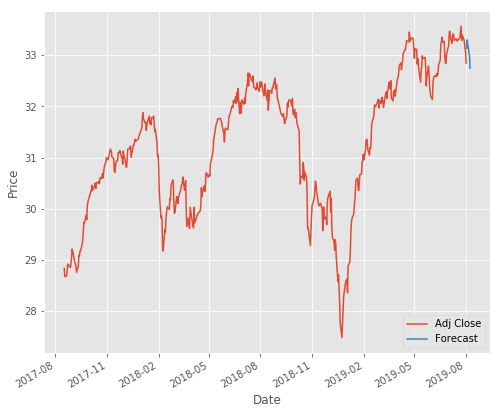

In [102]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [103]:
# Printing the forecast Quadratic Regression 2
forecast_set = clfpoly2.predict(X_lately) #added in the "reg"
dfpoly2['Forecast'] = np.nan
print(forecast_set, confidencepoly2, forecast_out) #added in the "reg"

[33.23844174 33.62045786 33.3318409  33.36349859 33.03305192 32.9077808
 32.55037429] 0.8780434811494645 7


In [104]:
last_date = dfpoly2.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfpoly2.loc[next_date] = [np.nan for _ in range(len(dfpoly2.columns)-1)]+[i]

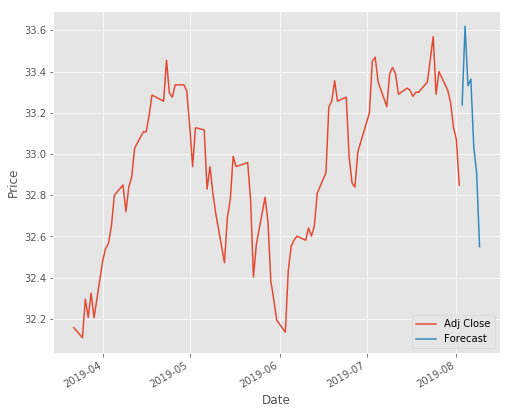

In [105]:
dfpoly2['Adj Close'].tail(100).plot()
dfpoly2['Forecast'].tail(100).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [106]:
# Plotting the Prediction - Quadratic Regression 3

[33.27927542 33.46350863 33.25720285 33.22966813 33.36301509 33.14095835
 32.7314019 ] 0.8610951198981989 7


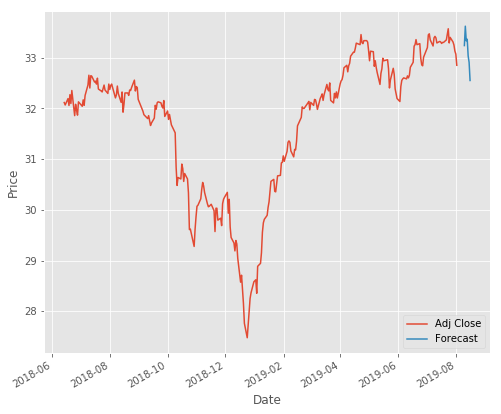

In [107]:
# Printing the forecast Quadratic Regression 3
forecast_set_poly3 = clfpoly3.predict(X_lately) #added in the "reg"
dfreg['Forecast'] = np.nan
print(forecast_set_poly3, confidencepoly3, forecast_out) #added in the "reg"

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
    
dfreg['Adj Close'].tail(300).plot()
dfreg['Forecast'].tail(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



In [109]:
# Plotting the Prediction - K Nearest Neighbours

[32.74270821 33.44499969 33.29377937 33.45295334 33.04015541 33.34499931
 32.42810059] 0.8180403570067879 7


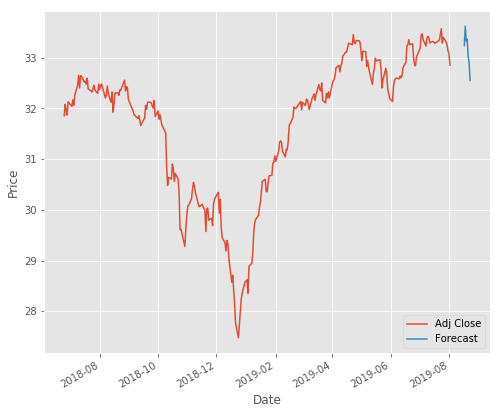

In [110]:
# Printing the forecast - K Nearest Neighbours
forecast_set_knn = clfknn.predict(X_lately) #added in the "reg"
dfreg['Forecast'] = np.nan
print(forecast_set_knn, confidenceknn, forecast_out) #added in the "reg"

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
    
dfreg['Adj Close'].tail(300).plot()
dfreg['Forecast'].tail(300).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()